In [ ]:
!pip install xgboost
!pip install tensorflow   # Versión estable de TF
!pip install scikit-learn  # Versión compatible con imblearn 0.11.0
!pip install imblearn     # Versión compatible con sklearn 1.3.0
!pip install scikeras     # Versión compatible con TF 2.15.0 y sklearn 1.3.0
!pip install category_encoders

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
Using cached scikeras-0.13.0-py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependen

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.datasets import load_diabetes, load_iris, load_wine
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    GradientBoostingClassifier,
    GradientBoostingRegressor,
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree
)
from typing import List, Optional, Tuple, Union
from xgboost import XGBClassifier, XGBRegressor

In [ ]:
# Cargamos el dataset de la práctica final

df_data = pd.read_csv("dataset_practica_final.csv")
df_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Variables

| Nombre Variable                  | Descripción                                              |
| -------------------------------- | -------------------------------------------------------- |
| `hotel`                          | Tipo de hotel: City Hotel o Resort Hotel                 |
| `is_canceled`                    | Variable objetivo: 1 si fue cancelado, 0 si no           |
| `lead_time`                      | Días entre la reserva y la fecha de llegada              |
| `arrival_date_year`              | Año de llegada                                           |
| `arrival_date_month`             | Mes de llegada                                           |
| `arrival_date_week_number`       | Número de la semana del año                              |
| `arrival_date_day_of_month`      | Día del mes de llegada                                   |
| `stays_in_weekend_nights`        | Noches de fin de semana reservadas                       |
| `stays_in_week_nights`           | Noches entre semana reservadas                           |
| `adults`                         | Número de adultos                                        |
| `children`                       | Número de niños                                          |
| `babies`                         | Número de bebés                                          |
| `meal`                           | Tipo de comida reservada                                 |
| `country`                        | País de origen del cliente                               |
| `market_segment`                 | Canal de marketing (online, offline, grupos...)          |
| `distribution_channel`           | Canal de distribución (directo, TA/TO...)                |
| `is_repeated_guest`              | 1 si el cliente ha estado anteriormente                  |
| `previous_cancellations`         | Nº de cancelaciones anteriores                           |
| `previous_bookings_not_canceled` | Nº de reservas previas no canceladas                     |
| `reserved_room_type`             | Tipo de habitación reservada                             |
| `assigned_room_type`             | Tipo de habitación asignada                              |
| `booking_changes`                | Nº de cambios en la reserva                              |
| `deposit_type`                   | Tipo de depósito: No Deposit, Refundable, etc.           |
| `agent`                          | ID del agente (puede ser nulo)                           |
| `company`                        | ID de la empresa (puede ser nulo)                        |
| `days_in_waiting_list`           | Días en lista de espera                                  |
| `customer_type`                  | Tipo de cliente: Transient, Group, etc.                  |
| `adr`                            | Average Daily Rate (precio promedio por noche)           |
| `required_car_parking_spaces`    | Plazas de parking solicitadas                            |
| `total_of_special_requests`      | Nº de peticiones especiales                              |
| `reservation_status`             | Estado final de la reserva: Check-Out, Canceled, No-Show |
| `reservation_status_date`        | Fecha en que se actualizó el estado                      |


In [ ]:
target_column = 'is_canceled'
list_independent_variables = df_data.drop(columns=target_column).columns.to_list()
list_independent_variables

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Vemos un poco que contiene cada columna y que tipos de variables vamos a manejar
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Sacamos las siguientes intuiciones de los valores nulos que hemos sacado del info():

| Nombre Variable | Estudio Preliminar |
|---|---|
| `children` | Contiene valores nulos, no son muchos por lo que podríamos completar aquellos que falten con la media o la moda. |
| `country` | Ocurre la misma situación que con children, tiene valores nulos y habría que ver qué hacemos con ellos. |
| `agent` | Tiene valores nulos pero según la descripción puede tomar valores nulos. |
| `company` | Tiene valores nulos, habría que ver qué hacer en este caso puesto que son muchos los valores nulos. |

In [ ]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
df_data.describe(include='object').transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


Ahora buscaremos que variables son aquellas que mayor impacto tienen en nuestra variable objetivo. Esto se puede ver con el método correlation. Este método segun su documentación solo recibe valores numéricos por lo que tendremos que decidir que hacemos con las variables categóricas, strings, fechas y con aquellas columnas que hemos visto que tienen valores nulos. Comenzaremos procesando las varibles categóricas y objects que tenemos.

In [ ]:
df_data_preprocessed = df_data.copy()
df_data_preprocessed

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Empezamos por el preprocesamiento de la variable hotel
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['hotel'], drop_first=True, dtype=int)
# df_data_preprocessed['hotel_Resort Hotel'] = df_data_preprocessed['hotel_Resort Hotel'].astype('int64')
df_data_preprocessed['hotel_Resort Hotel']

,hotel_Resort Hotel
0,1
1,1
2,1
3,1
4,1
...,...
119385,0
119386,0
119387,0
119388,0


In [ ]:
# Ahora pasamos con arrival date month
month_list = df_data_preprocessed['arrival_date_month'].unique().tolist()
month_list

['July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June']

In [ ]:
# ahora con comprehensions y recorriendo la lista sustituimos cada mes
month_correspondance = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df_data_preprocessed['arrival_date_month'] = df_data_preprocessed['arrival_date_month'].replace(month_correspondance)
df_data_preprocessed['arrival_date_month']

# df_data['arrival_date_month'] = [df_data['arrival_date_month'].replace({month_list[month]: month}) for month in range(len(month_list))]

/tmp/ipython-input-8-3515586782.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed['arrival_date_month'] = df_data_preprocessed['arrival_date_month'].replace(month_correspondance)


,arrival_date_month
0,7
1,7
2,7
3,7
4,7
...,...
119385,8
119386,8
119387,8
119388,8


In [ ]:
# Ahora pasaremos con los tipos de habitaciones que puedes escoger y con las que son asignadas

df_data_preprocessed['assigned_room_type'].unique().tolist()

['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K']

In [ ]:
df_data_preprocessed['reserved_room_type'].unique().tolist()

['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B']

In [ ]:
# Viendo los posibles valores que se toman en ambas columnas definiremos un dict con los posibles valores que se toman de ambas listas


reserved_rooms = sorted(df_data_preprocessed['assigned_room_type'].unique().tolist())
rooms = {}
for i in range(len(reserved_rooms)):
    rooms[reserved_rooms[i]] = i

# rooms['I'] = 10
# rooms['K'] = 11

print(rooms)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'P': 11}


In [ ]:
df_data_preprocessed['reserved_room_type'] = df_data_preprocessed['reserved_room_type'].replace(rooms)
df_data_preprocessed['assigned_room_type'] = df_data_preprocessed['assigned_room_type'].replace(rooms)

/tmp/ipython-input-10-2526571645.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed['reserved_room_type'] = df_data_preprocessed['reserved_room_type'].replace(rooms)
/tmp/ipython-input-10-2526571645.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed['assigned_room_type'] = df_data_preprocessed['assigned_room_type'].replace(rooms)


In [ ]:
# df_data_preprocessed['reserved_room_type']
df_data_preprocessed['reserved_room_type'].unique().tolist()

[2, 0, 3, 4, 6, 5, 7, 10, 11, 1]

In [ ]:
df_data_preprocessed['assigned_room_type'].unique().tolist()

[2, 0, 3, 4, 6, 5, 8, 1, 7, 11, 10, 9]

In [ ]:
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  object 
 12  country         

In [ ]:
df_data_preprocessed['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
meals = {'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}

df_data_preprocessed['meal'] = df_data_preprocessed['meal'].replace(meals)
df_data_preprocessed['meal']

/tmp/ipython-input-11-2739196554.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed['meal'] = df_data_preprocessed['meal'].replace(meals)


,meal
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [ ]:
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['market_segment'], dtype=int, drop_first=True)
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reservation_status,reservation_status_date,hotel_Resort Hotel,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined
0,0,342,2015,7,27,1,0,0,2,0.0,...,Check-Out,2015-07-01,1,0,0,1,0,0,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,Check-Out,2015-07-01,1,0,0,1,0,0,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,Check-Out,2015-07-02,1,0,0,1,0,0,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,Check-Out,2015-07-02,1,0,1,0,0,0,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,Check-Out,2015-07-03,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,Check-Out,2017-09-06,0,0,0,0,0,1,0,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,Check-Out,2017-09-07,0,0,0,0,0,0,1,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,Check-Out,2017-09-07,0,0,0,0,0,0,1,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,Check-Out,2017-09-07,0,0,0,0,0,0,1,0


In [ ]:
df_data_preprocessed['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['distribution_channel'], dtype=int, drop_first=True)
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,0,342,2015,7,27,1,0,0,2,0.0,...,0,1,0,0,0,0,1,0,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,0,1,0,0,0,0,1,0,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,0,1,0,0,0,0,1,0,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,0,0,0,1,0,0,0,0,1,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,0,0,0,1,0,0,0,1,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,0,0,0,1,0,0,0,1,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Para agent vemos que no podremos aplicar un Label encoding usando diccionarios o OneHotEncoding con get_dummies
df_data_preprocessed['agent'].unique().tolist()

[nan,
 304.0,
 240.0,
 303.0,
 15.0,
 241.0,
 8.0,
 250.0,
 115.0,
 5.0,
 175.0,
 134.0,
 156.0,
 243.0,
 242.0,
 3.0,
 105.0,
 40.0,
 147.0,
 306.0,
 184.0,
 96.0,
 2.0,
 127.0,
 95.0,
 146.0,
 9.0,
 177.0,
 6.0,
 143.0,
 244.0,
 149.0,
 167.0,
 300.0,
 171.0,
 305.0,
 67.0,
 196.0,
 152.0,
 142.0,
 261.0,
 104.0,
 36.0,
 26.0,
 29.0,
 258.0,
 110.0,
 71.0,
 181.0,
 88.0,
 251.0,
 275.0,
 69.0,
 248.0,
 208.0,
 256.0,
 314.0,
 126.0,
 281.0,
 273.0,
 253.0,
 185.0,
 330.0,
 334.0,
 328.0,
 326.0,
 321.0,
 324.0,
 313.0,
 38.0,
 155.0,
 68.0,
 335.0,
 308.0,
 332.0,
 94.0,
 348.0,
 310.0,
 339.0,
 375.0,
 66.0,
 327.0,
 387.0,
 298.0,
 91.0,
 245.0,
 385.0,
 257.0,
 393.0,
 168.0,
 405.0,
 249.0,
 315.0,
 75.0,
 128.0,
 307.0,
 11.0,
 436.0,
 1.0,
 201.0,
 183.0,
 223.0,
 368.0,
 336.0,
 291.0,
 464.0,
 411.0,
 481.0,
 10.0,
 154.0,
 468.0,
 410.0,
 390.0,
 440.0,
 495.0,
 492.0,
 493.0,
 434.0,
 57.0,
 531.0,
 420.0,
 483.0,
 526.0,
 472.0,
 429.0,
 16.0,
 446.0,
 34.0,
 78.0,
 139.0,

In [ ]:
# Hemos pensado que a los valores que sean Nan los completamos con la media

agent_mean = df_data_preprocessed['agent'].mean()
df_data_preprocessed['agent'] = df_data_preprocessed['agent'].fillna(agent_mean)
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

#### Variable customer_type

In [ ]:
df_data_preprocessed['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['customer_type'], dtype=int, drop_first=True)
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,7,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,1,0,0,0,0,1,0,0,1,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,1,0,0,0,1,0,0,1,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,1,0,0,0,1,0,0,1,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
df_data_preprocessed.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'hotel_Resort Hotel',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_channel_Undefined', 'c

#### Variable company

In [ ]:
# Al tener muchas filas con un valor nulo crearemos una columna nueva denominada has_company

df_data_preprocessed['has_company'] = df_data_preprocessed['company'].isna().astype(int)
df_data_preprocessed = df_data_preprocessed.drop(columns=['company'])
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

#### Variable country

In [ ]:
# Para country y los valores que faltan primero calculamos la moda de esa columna

country_mode = df_data_preprocessed['country'].mode()[0]
df_data_preprocessed['country'] = df_data_preprocessed['country'].fillna(country_mode)
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

In [ ]:
def cat_to_cuant(field: str):
    conv_dict= dict([(i, idx) for idx, i in enumerate(df_data_preprocessed[field].unique())])
    return df_data_preprocessed[field].replace(conv_dict)


df_data_preprocessed['country']=cat_to_cuant('country')
df_data_preprocessed['country'].unique()

/tmp/ipython-input-18-1338036426.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df_data_preprocessed[field].replace(conv_dict)


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176])

#### Variable deposit_type

In [ ]:
df_data_preprocessed['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['deposit_type'], dtype=int, drop_first=True)
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,has_company,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,1,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,1,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,1,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,0,0,0,0,0,1,0,1,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,0,1,0,0,1,0,1,0,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0


Y por último nos cargamos las dos columnas que se consideran posteriores o un resultado de nuestra target_column

In [ ]:
df_data_preprocessed = df_data_preprocessed.drop(columns=['reservation_status', 'reservation_status_date'])
df_data_preprocessed

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,has_company,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,1,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,1,0,0,0,0,1,0,1,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,1,0,0,0,0,1,0,1,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,0,0,0,0,0,1,0,1,0,0
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0
119386,0,102,2017,8,35,31,2,5,3,0.0,...,0,0,1,0,0,1,0,1,0,0
119387,0,34,2017,8,35,31,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0
119388,0,109,2017,8,35,31,2,5,2,0.0,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
# Todos los get_dummies juntos
# df_data_preprocessed = pd.get_dummies(df_data_preprocessed, columns=['hotel', 'market_segment', 'customer_type', 'deposit_type'], drop_first=True, dtype=int)

In [ ]:
# Despues del preprocesamiento las nuevas columnas creadas sus nombres los separamos con barra baja

df_data_preprocessed.columns = df_data_preprocessed.columns.str.lower().str.replace(" ", "_")

In [ ]:
df_data_preprocessed.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'hotel_resort_hotel',
       'market_segment_complementary', 'market_segment_corporate',
       'market_segment_direct', 'market_segment_groups',
       'market_segment_offline_ta/to', 'market_segment_online_ta',
       'market_segment_undefined', 'distribution_channel_direct',
       'distribution_channel_gds', 'distribution_channel_ta/to',
       'distribution_channel_undefined', 'customer_type_group',
       'customer_type_transient', 'customer_type_transient-par

In [ ]:
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119386 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

In [ ]:
children_mode = df_data_preprocessed['children'].mode()[0]
df_data_preprocessed['children'] = df_data_preprocessed['children'].fillna(children_mode)
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

In [ ]:
df_data_preprocessed.is_canceled.value_counts()

,count
is_canceled,
0,75166
1,44224


Usando la funcion de correlación y la lista de porcentajes devuelta observamos que:

- Desde deposit_type_non_refund hasta distribution_channel_direct son las más relevantes para determinar nuestra variable target con más de un 0.15% de relevancia sobre la misma.

- Desde booking_changes hasta la variable days_in_waiting_list pueden ser tenidas en cuenta puesto que su porcentaje sigue siendo relevante aunque menor que las anteriores. Entre estas podría haber alguna que sea interesante de emplear para el entrenamiento de los modelos.

- Desde adr a stays_in_weekend_nights, al ser de correlacion muy baja para nuestro estudio, inicialmente no las tendremos en cuenta.

In [ ]:
df_data_preprocessed.corr()['is_canceled'].abs().sort_values(ascending=False)

,is_canceled
is_canceled,1.000000
deposit_type_non_refund,0.481457
lead_time,0.293123
total_of_special_requests,0.234658
market_segment_groups,0.221859
required_car_parking_spaces,0.195498
assigned_room_type,0.176028
distribution_channel_ta/to,0.175944
market_segment_direct,0.154390
distribution_channel_direct,0.151620


In [ ]:
# Las que tienen corr alta
top_features = [
    'deposit_type_non_refund',
    'lead_time',
    'total_of_special_requests',
    'market_segment_groups',
    'required_car_parking_spaces',
    'assigned_room_type',
    'distribution_channel_ta/to',
    'market_segment_direct',
    'distribution_channel_direct'
]

# Aquellas con corr ni fu ni fa
mid_features = [
    'booking_changes',
    'hotel_resort_hotel',
    'customer_type_transient',
    'customer_type_transient-party',
    'previous_cancellations',
    'has_company',  # Muy cerca de 0.10, buena candidata
    'country',      # Muy cerca de 0.10, buena candidata, pero recuerda que 'country' es una serie de dummies, no la original
    'is_repeated_guest',
    'market_segment_corporate',
    'agent',
    'reserved_room_type',
    'adults',
    'previous_bookings_not_canceled',
    'days_in_waiting_list'
]

In [ ]:
# Visualizamos las gráficas de las variables mas relevantes

df_data_topf = df_data_preprocessed.copy()
df_data_topf = df_data_topf[top_features]
df_data_topf

NameError: name 'top_features' is not defined

In [ ]:
df_data_topf[target_column] = df_data_preprocessed[target_column]
df_data_topf

,deposit_type_non_refund,lead_time,total_of_special_requests,market_segment_groups,required_car_parking_spaces,assigned_room_type,distribution_channel_ta/to,market_segment_direct,distribution_channel_direct,is_canceled
0,0,342,0,0,0,2,0,1,1,0
1,0,737,0,0,0,2,0,1,1,0
2,0,7,0,0,0,2,0,1,1,0
3,0,13,0,0,0,0,0,0,0,0
4,0,14,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
119385,0,23,0,0,0,0,1,0,0,0
119386,0,102,2,0,0,4,1,0,0,0
119387,0,34,4,0,0,3,1,0,0,0
119388,0,109,0,0,0,0,1,0,0,0


In [ ]:
sns.pairplot(df_data_topf, hue=target_column, palette='Set1')

In [ ]:
sns.heatmap(df_data_topf.corr(), cmap='coolwarm')

In [ ]:
sns.boxplot(x=target_column, y='deposit_type_non_refund', data=df_data_topf)

In [ ]:
# Probamos la función de selctKbest features a ver si nos da características diferentes a las que hemos visto
from sklearn.feature_selection import SelectKBest, f_classif

y_kfeat = df_data_preprocessed[target_column]
X_kfeat = df_data_preprocessed.drop(columns=target_column)

X_train, X_test, y_train, y_test = train_test_split(X_kfeat, y_kfeat, test_size=0.2, random_state=42)

selector = SelectKBest(f_classif, k=5)
X_train_feat = selector.fit_transform(X_train, y_train)
X_test_feat = selector.transform(X_test)

In [ ]:
selected_features_mask = selector.get_support() # Esto devuelve un array booleano [True, False, True, ...]
selected_feature_names = X_train.columns[selected_features_mask]

In [ ]:
X_train_feat_df = pd.DataFrame(X_train_feat, columns=selected_feature_names, index=X_train.index)
X_test_feat_df = pd.DataFrame(X_test_feat, columns=selected_feature_names, index=X_test.index)

In [ ]:
X_train_feat_df

In [ ]:
# Vamos a escalar lead_time

scaler = StandardScaler()

X_train_scaled_leadtime = scaler.fit_transform(X_train_feat_df[['lead_time']])
X_test_scaled_leadtime = scaler.transform(X_test_feat_df[['lead_time']])

X_train_scaled_df = pd.DataFrame(X_train_scaled_leadtime, columns=['lead_time'], index=X_train_feat_df.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_leadtime, columns=['lead_time'], index=X_test_feat_df.index)

columns_to_concat = ['required_car_parking_spaces', 'total_of_special_requests', 'market_segment_groups', 'deposit_type_non_refund']
X_train_final = pd.concat([X_train_scaled_df, X_train_feat_df[columns_to_concat]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_feat_df[columns_to_concat]], axis=1)

In [ ]:
import pandas as pd
import numpy as np

def explorar_valores_columna(df, top_n_values=5):
    """
    Explora y muestra los valores y estadísticas clave para cada columna de un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame a explorar.
        top_n_values (int): El número de valores más frecuentes a mostrar
                              para columnas categóricas/object.
    """
    print(f"Explorando DataFrame con {df.shape[0]} filas y {df.shape[1]} columnas.\n")

    for col in df.columns:
        print(f"--- Columna: '{col}' ---")
        print(f"Tipo de Dato: {df[col].dtype}")
        print(f"Valores Nulos: {df[col].isnull().sum()} ({df[col].isnull().sum() / len(df) * 100:.2f}%)")
        print(f"Valores Únicos: {df[col].nunique()}")

        # Manejo de tipos de datos para mostrar la información relevante
        if pd.api.types.is_numeric_dtype(df[col]):
            # Es numérica
            print(f"Mínimo: {df[col].min()}")
            print(f"Máximo: {df[col].max()}")
            print(f"Media: {df[col].mean():.2f}")
            print(f"Mediana: {df[col].median():.2f}")
            print(f"Desviación Estándar: {df[col].std():.2f}")
        elif pd.api.types.is_bool_dtype(df[col]):
            # Es booleana
            print("Conteo de Valores:")
            print(df[col].value_counts())
        else:
            # Es categórica (object, category)
            if df[col].nunique() <= top_n_values * 5: # Mostrar todos si no hay demasiados únicos
                 print("Valores Únicos (todos):")
                 print(df[col].unique())
            else: # Si hay muchos valores únicos, mostrar solo los más frecuentes
                print(f"Top {top_n_values} Valores Más Frecuentes:")
                print(df[col].value_counts().head(top_n_values))
        print("-" * 40 + "\n")


explorar_valores_columna(df=X_train_feat_df)

# Regresión Logistica (Gaizka)

Viendo los posibles valroes de las features más relevantes tendremos que escalar parte de las características para que sean más manejables para nuestro modelo:

In [ ]:
features_to_scale = [
    'lead_time',
    'total_of_special_requests',
    'required_car_parking_spaces',
    'assigned_room_type'
]

features_no_scale = [
    'deposit_type_non_refund',
    'market_segment_groups',
    'distribution_channel_ta/to',
    'market_segment_direct',
    'distribution_channel_direct'
]

In [ ]:
X = df_data_topf.drop(columns=target_column)
y = df_data_topf[target_column]

NameError: name 'df_data_topf' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Instanciar el escalador
scaler = StandardScaler()

# Ajustar el escalador SOLO en los datos de entrenamiento para las columnas específicas
X_train_scaled_parts = scaler.fit_transform(X_train[features_to_scale])

# Transformar los datos de prueba usando el mismo escalador ajustado
X_test_scaled_parts = scaler.transform(X_test[features_to_scale])

# Convertir los resultados escalados de nuevo a DataFrame para mantener los nombres de las columnas
X_train_scaled_df = pd.DataFrame(X_train_scaled_parts, columns=features_to_scale, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_parts, columns=features_to_scale, index=X_test.index)

# Recombinar las columnas escaladas con las no escaladas
# Asegúrate de que las columnas no escaladas se seleccionen correctamente
X_train_final = pd.concat([X_train_scaled_df, X_train[features_no_scale]], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test[features_no_scale]], axis=1)

In [ ]:
X_train_final

,lead_time,required_car_parking_spaces,total_of_special_requests,market_segment_groups,deposit_type_non_refund
67702,-0.373594,0.0,0.0,0.0,0.0
115851,-0.654357,0.0,0.0,0.0,0.0
57345,-0.897685,0.0,0.0,0.0,0.0
11622,1.376493,0.0,1.0,0.0,0.0
33333,-0.757303,0.0,1.0,0.0,0.0
...,...,...,...,...,...
76820,-0.953837,1.0,0.0,0.0,0.0
110268,-0.120908,0.0,0.0,0.0,0.0
103694,-0.280007,0.0,0.0,0.0,0.0
860,0.244084,0.0,2.0,0.0,0.0


In [ ]:
X_test_final

,lead_time,required_car_parking_spaces,total_of_special_requests,market_segment_groups,deposit_type_non_refund
30946,0.927273,0.0,0.0,0.0,0.0
40207,-0.205137,0.0,0.0,0.0,0.0
103708,-0.738586,0.0,1.0,0.0,0.0
85144,-0.963196,0.0,0.0,0.0,0.0
109991,-0.317442,0.0,0.0,0.0,0.0
...,...,...,...,...,...
48376,1.376493,0.0,0.0,1.0,1.0
19712,0.449976,0.0,0.0,0.0,0.0
32188,-0.598204,0.0,0.0,1.0,0.0
92983,0.047550,0.0,0.0,0.0,0.0


Una vez escaladas las características que requeríamos entrenaremos nuestro modelo

In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Entrenamos un modelo usando GridSearchCV para encontrar los mejores hiperparámetros
dict_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2',  'elasticnet'],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

pipeline = ImbPipeline(steps=[
    ('smote', SMOTE(random_state=42)), # Luego, aplicamos SMOTE al conjunto de entrenamiento de cada fold
    ('logisticregression', LogisticRegression(max_iter=200, random_state=42, class_weight='balanced'))
])

param_grid = [
    # Combinaciones para solver='liblinear' (solo 'l1' y 'l2')
    {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logisticregression__solver': ['liblinear'],
        'logisticregression__penalty': ['l1', 'l2']
    },
    # Combinaciones para solver='saga' (soporta 'l1', 'l2', 'elasticnet')
    {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'logisticregression__solver': ['saga'],
        'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
        # l1_ratio solo es relevante si penalty es 'elasticnet'
        'logisticregression__l1_ratio': [0.1, 0.5, 0.9] # Este se probará solo cuando penalty sea 'elasticnet'
    }
]

modelo_rl = LogisticRegression(max_iter=200, random_state=42, class_weight='balanced') # Añadimos aqui balanced class para dar más importancia a la clase minoritaria (cancelaciones)
modelo_rl_cv = GridSearchCV(pipeline, param_grid, cv=5, scoring="f1", n_jobs=-1, verbose=2)
modelo_rl_cv.fit(X_train_final, y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=200,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                          'logisticregression__l1_ratio': [0.1, 0.5, 0.9],
                          'logisticregression__penalty': ['l1', 'l2',
                                                          'elasticnet'],
                          'logisticregression__solver': ['saga']}],
             scoring='f1', verbose=2)

In [ ]:
# Mostramos los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros encontrados: {modelo_rl_cv.best_params_}")
print(f"Mejor score obtenido: {modelo_rl_cv.best_score_:.2%}")

Mejores hiperparámetros encontrados: {'logisticregression__C': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Mejor score obtenido: 59.97%


In [ ]:
best_model_pipeline = modelo_rl_cv.best_estimator_
y_pred = best_model_pipeline.predict(X_test_final) # Usa X_test ORIGINAL si tu pipeline tiene preprocesador
y_prob = best_model_pipeline.predict_proba(X_test_final)[:, 1] # Usa X_test ORIGINAL

In [ ]:
# Entrenamos el modelo con los mejores hiperparámetros encontrados
modelo_rl = LogisticRegression(**modelo_rl_cv.best_params_, max_iter=500, random_state=42)
modelo_rl.fit(X_train_final, y_train)

TypeError: LogisticRegression.__init__() got an unexpected keyword argument 'logisticregression__C'

Hacemos las predicciones:


In [ ]:
# Hacemos predicciones sobre el conjunto de test
y_pred = modelo_rl.predict(X_test_final)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Verificamos las clases del modelo
print(f"Clases del modelo: {modelo_rl.classes_}")

Clases del modelo: [0 1]


In [ ]:
y_prob = modelo_rl.predict_proba(X_test_final)[:,1]
y_prob

array([0.34477194, 0.26314009, 0.45681852, ..., 0.44403064, 0.32450286,
       0.38131862])

In [ ]:
# Obtenemos las probabilidades de pertenencia a la clase positiva (1)
# En este caso, la clase positiva es 'Enfermedad'
y_proba = modelo_rl.predict_proba(X_test_final)[:, 1]

In [ ]:
# Para hacerlo de manera dinámica sería así
canceled = np.where(modelo_rl.classes_ == 1)[0][0]
y_proba = modelo_rl.predict_proba(X_test_final)[:, canceled]

In [ ]:
# Mostramos las primeras 5 etiquetas reales, las probabilidades de pertenencia a la clase positiva y las predicciones
print(f"Primeras 5 etiquetas reales: {y_test.iloc[:5].values}")
print(f"Primeras 5 probabilidades: {y_prob[:5]}")
print(f"Primeras 5 predicciones: {y_pred[:5]}")

Primeras 5 etiquetas reales: [0 1 0 0 0]
Primeras 5 probabilidades: [0.59995717 0.48954111 0.34083598 0.41552798 0.47846709]
Primeras 5 predicciones: [1 0 0 0 0]


In [ ]:
# Obtención de las métricas de evaluación
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Cálculo del AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy:  {acc:.2f}")
print(f"Precisión: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-Score:  {f1:.2f}")
print(f"AUC:       {auc:.2f}\n")

Accuracy:  0.73
Precisión: 0.68
Recall:    0.55
F1-Score:  0.61
AUC:       0.78



In [ ]:
# Gracias a la función classification_report podemos obtener un reporte detallado de las métricas de evaluación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80     14907
           1       0.68      0.55      0.61      8971

    accuracy                           0.73     23878
   macro avg       0.72      0.70      0.70     23878
weighted avg       0.73      0.73      0.73     23878



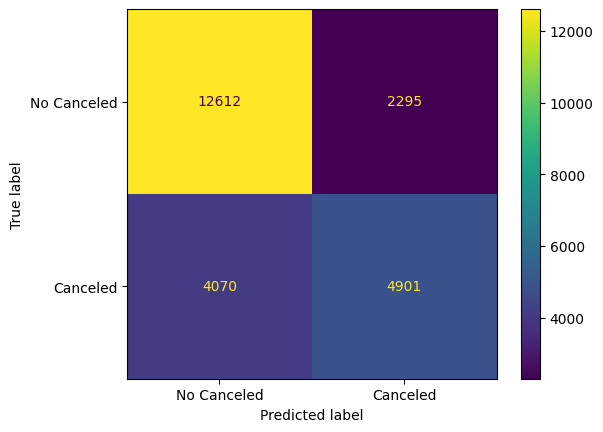

In [ ]:
# Mostramos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Canceled', 'Canceled'])
disp.plot()
plt.show()

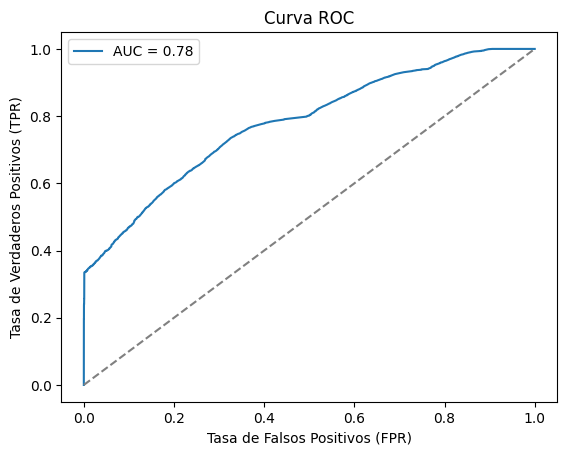

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [ ]:
# Versión de Plotly de la curva ROC
fig = px.area(
    x=fpr,
    y=tpr,
    title=f'ROC Curve (AUC={auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

Mejor Umbral para F1: 0.4278
F1-Score en este umbral: 0.6459
Precisión en este umbral: 0.5707
Recall en este umbral: 0.7440


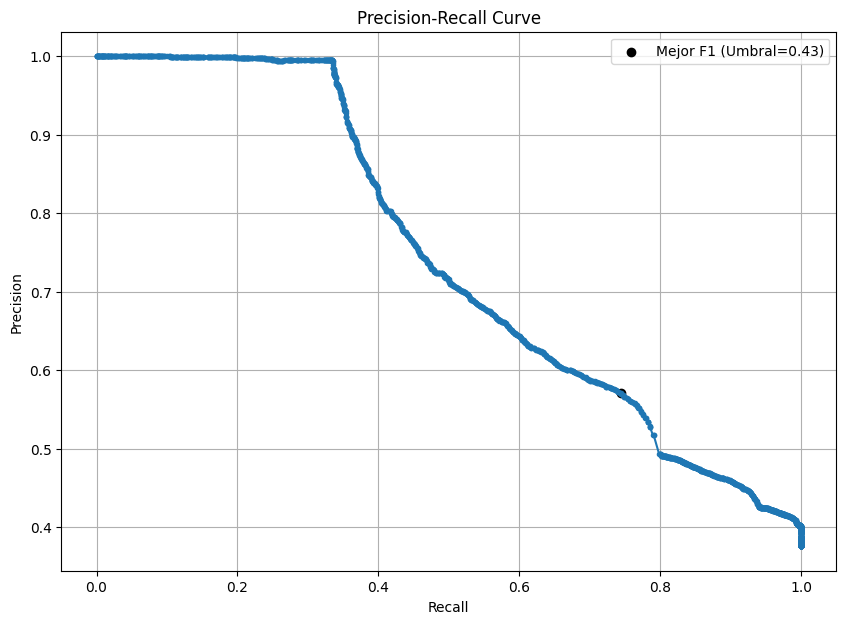


Informe de clasificación con umbral ajustado:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73     14907
           1       0.57      0.74      0.65      8971

    accuracy                           0.69     23878
   macro avg       0.69      0.70      0.69     23878
weighted avg       0.72      0.69      0.70     23878



In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Obtén el mejor estimador del GridSearchCV
best_model = modelo_rl_cv.best_estimator_

# Obtén las probabilidades en el conjunto de prueba
y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]

# Calcula la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Encuentra el umbral que maximiza el F1-score
fscores = (2 * precision * recall) / (precision + recall)
# Evitar NaN si hay divisiones por cero (cuando precision + recall es 0)
fscores = np.nan_to_num(fscores)
ix = np.argmax(fscores)
optimal_threshold = thresholds[ix]
optimal_f1 = fscores[ix]
optimal_precision = precision[ix]
optimal_recall = recall[ix]

print(f"Mejor Umbral para F1: {optimal_threshold:.4f}")
print(f"F1-Score en este umbral: {optimal_f1:.4f}")
print(f"Precisión en este umbral: {optimal_precision:.4f}")
print(f"Recall en este umbral: {optimal_recall:.4f}")

# Graficar la curva Precision-Recall
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, marker='.')
plt.scatter(optimal_recall, optimal_precision, marker='o', color='black', label=f'Mejor F1 (Umbral={optimal_threshold:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Evalúa el modelo con el umbral óptimo
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)
from sklearn.metrics import classification_report
print("\nInforme de clasificación con umbral ajustado:")
print(classification_report(y_test, y_pred_adjusted))

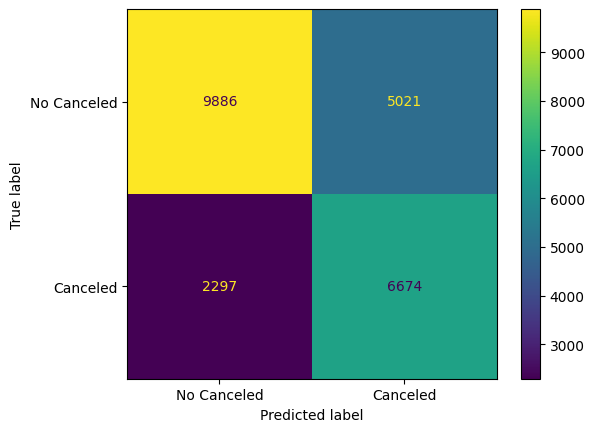

In [ ]:
cm = confusion_matrix(y_test, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Canceled', 'Canceled'])
disp.plot()
plt.show()

In [ ]:
#
#Esto es una clase que se instanciará por cada uno de los modelos que vamos a comparar.
#               -----------------------
#               |     Clase Base      |
#               -----------------------
#               | *Visualización.     |
#               | *Constr de tablas   |
#               |  comparativas.      |
#               | *Mét. abstractos    |
#               | *Algo más?          |
#               ----------------------
#                   /             \
#                  /               \
#             ------------     ------------
#             | Clase ML |     | Clase DL |
#             ------------     ------------
#             |ImplMétAbs|     |ImplMétAbs|
#             ------------     ------------
# Así el usuario accedera desde la clase base sin tener que conocer las particularidades de un tipo de modelo y otro
# haciendolo así más accesible. En consecuencia, muchos de los parámetros tendrán que poder ser configurables, pero no necesarios
# es decir, usar valores predeterminados.

#Función para la clase base

#A continuacíon se definen las funciones principales de la clase ML
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

def train(model: BaseEstimator, X_train, y_train, param_grid: dict, scoring: str):
  """
  Entrena un modelo de sklearn con GridSearchCV
  """
  grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=5)
  result=grid.fit(X_train, y_train)
  #logger.info(f"Se entrena {type(model).__name__} con lo hiperparámetros {grid.best_params_} y con un score promedio en CV de, {grid.best_score_}")
  return result


def evaluate(model: BaseEstimator, X_test, y_test):
  """
  Evalua los modelos y devuelve las distintas métricas para poder compararlas después.
  """
  y_pred = model.predict(X_test)
  try: #No todos los modelos tienen predict_proba, ver si los requeridos sí y si eso eliminar el try.
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
  except AttributeError:
    roc_auc = None

  results = {
      "accuracy": accuracy_score(y_test, y_pred),
      "precision": precision_score(y_test, y_pred),
      "recall": recall_score(y_test, y_pred),
      "f1": f1_score(y_test, y_pred),
      "roc_auc": roc_auc
  }
  #logger.info(f"Métricas calculadas correctamente")
  return results

In [ ]:
#Prueba dummy
X = df_data_preprocessed[['lead_time','booking_changes']]
y = df_data_preprocessed['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)
param_grid={
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

result=train(LogisticRegression(), X_train, y_train, param_grid, 'accuracy')
result.best_params_

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
evaluate(result, X_test, y_test)

{'accuracy': 0.6740933076472067,
 'precision': 0.6122492080253432,
 'recall': 0.3277557942340305,
 'f1': 0.42695139911634755,
 'roc_auc': np.float64(0.7119851946595575)}

In [ ]:
one_hot_encod=['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type', 'deposit_type']
label_encod=['arrival_date_month', 'reserved_room_type']

df_data = pd.read_csv("/content/dataset_practica_final.csv")
df_data_preprocessed = pre_process(df_data, label_encod, one_hot_encod)
df_data_preprocessed.columns

/tmp/ipython-input-7-3902288661.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data_preprocessed[col] = df_data_preprocessed[col].replace(conv_dict)


Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'hotel_resort_hotel', 'meal_fb', 'meal_hb',
       'meal_sc', 'meal_undefined', 'market_segment_complementary',
       'market_segment_corporate', 'market_segment_direct',
       'market_segment_groups', 'market_segment_offline_ta/to',
       'market_segment_online_ta', 'market_segment_undefined',
       'distribution_channel_direct', 'distribution_channel_gds',
       'distribution_channel_ta/to', 'distribu

In [ ]:
df_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  meal                            119390 non-null  int64  
 12  country         

## Red Neuronal

In [ ]:
!pip install scikeras

In [ ]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/3c/e3/e868f1d5951047f950d2ba1e04a765a3328a51f06996b67976d6102f8227/tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751cd1a0c3a6ae84346796a5758123f3ed97a1b121dfbf4f3/gast-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for google-pasta>=0.1.1 from https://files.pythonhosted.org/packages/a3/de/c648ef6835192

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential # Import Sequential directly
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


np.random.seed(42)

y_kfeat = df_data_preprocessed[target_column]
X_kfeat = df_data_preprocessed.drop(columns=target_column)

X_train, X_test, y_train, y_test = train_test_split(X_kfeat, y_kfeat, test_size=0.2, random_state=42)

def create_cnn_model(input_shape, num_classes, pool_size=2, filters=32, kernel_size=3, dense_units=64, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential()
    # Primera capa convolucional
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size)) # Reduce la dimensionalidad

    # Aplanar la salida para conectarla a capas densas (fully connected)
    model.add(Flatten())

    # Capa densa
    model.add(Dense(units=dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))
    loss_func = 'binary_crossentropy'
    metrics_list = ['accuracy']

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_func, metrics=metrics_list)
    return model


# input_shape_cnn = (X_train.shape[1], 1)
num_classes = len(np.unique(y_train)
my_cnn_model = create_cnn_model(input_dim=X_train.shape[1], num_classes=num_classes)
my_cnn_model.summary()

cnn_model_wrapper = KerasClassifier(model=create_cnn_model, model__input_shape=(None, 1), verbose=0,
                                    # model__input_dim='infer',
                                    # model__input_shape=input_shape_cnn,
                                    model__num_classes=num_classes)

pipeline_cnn = Pipeline([
    ('selector', SelectKBest()),
    ('scaler', StandardScaler()),
    ('cnn', cnn_model_wrapper)
])


param_grid_cnn = {
    # Parámetros para SelectKBest
    'selector__score_func': [f_classif, mutual_info_classif],
    'selector__k': [5, 10],

    # Parámetros para StandardScaler
    # 'scaler': [StandardScaler(), MinMaxScaler()],

    # Parámetros específicos de la arquitectura CNN
    'cnn__model__filters': [16, 32],
    # 'cnn__model__kernel_size': [2, 3], # Tamaño del kernel
    # 'cnn__model__pool_size': [2], # Tamaño del pooling
    'cnn__model__dense_units': [32, 64], # Unidades en la capa densa
    'cnn__model__dropout_rate': [0.0, 0.2], # Tasa de dropout para regularización
    'cnn__model__learning_rate': [0.001, 0.0005], # Tasa de aprendizaje del optimizador Adam

    # Parámetros de entrenamiento de la red
    'cnn__epochs': [5, 10], # Número de épocas para entrenar cada modelo en el grid
    'cnn__batch_size': [16, 32] # Tamaño del batch
}

grid_search_cnn = GridSearchCV(estimator=pipeline_cnn,
                               param_grid=param_grid_cnn,
                               scoring='accuracy',
                               cv=3, # Validación cruzada
                               n_jobs=-1, # Usa todos los núcleos de CPU
                               verbose=0)

grid_search_cnn.fit(X_train, y_train)

print(f"\nMejor puntuación: {grid_search_cnn.best_score_:.4f}")
print(f"Mejores parámetros: {grid_search_cnn.best_params_}")

best_cnn_pipeline = grid_search_cnn.best_estimator_
y_pred = best_cnn_pipeline.predict(X_test)

C:\Users\gaizk\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 39, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 19, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 608)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          38,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,169 (153.00 KB)

 Trainable params: 39,169 (153.00 KB)

 Non-trainable params: 0 (0.00 B)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


ValueError: 
All the 768 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
768 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gaizk\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gaizk\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gaizk\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "C:\Users\gaizk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "C:\Users\gaizk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "C:\Users\gaizk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 925, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gaizk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 862, in _initialize
    self.model_ = self._build_keras_model()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gaizk\anaconda3\Lib\site-packages\scikeras\wrappers.py", line 433, in _build_keras_model
    model = final_build_fn(**build_params)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: create_cnn_model() missing 1 required positional argument: 'input_dim'


## Red Neuronal Simple

Número de características de entrada (input_dim): 41

Creando el modelo de red neuronal simple...


C:\Users\gaizk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo de red neuronal simple...
Epoch 1/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.7582 - loss: 0.4918 - val_accuracy: 0.8192 - val_loss: 0.3897
Epoch 2/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8195 - loss: 0.3960 - val_accuracy: 0.8268 - val_loss: 0.3752
Epoch 3/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8245 - loss: 0.3869 - val_accuracy: 0.8330 - val_loss: 0.3665
Epoch 4/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8292 - loss: 0.3743 - val_accuracy: 0.8327 - val_loss: 0.3603
Epoch 5/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8284 - loss: 0.3758 - val_accuracy: 0.8381 - val_loss: 0.3559
Epoch 6/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8310 - loss: 0.3704 - val_accuracy: 0.8429 - val_loss: 0.3540
Epoch 7/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8289 - loss: 0.3725 - val_accuracy: 0.8400 - val_loss: 0.3548
Epoch 8/200
7641/7641 ━━━━━━

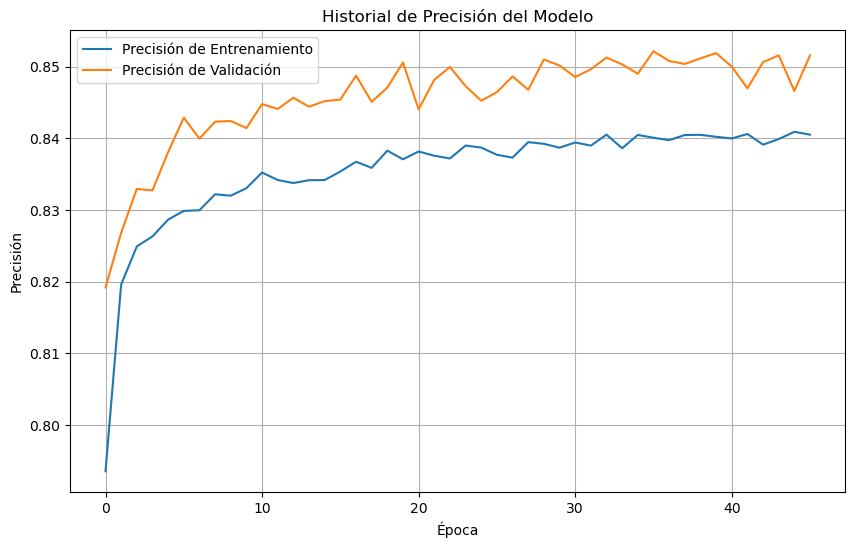

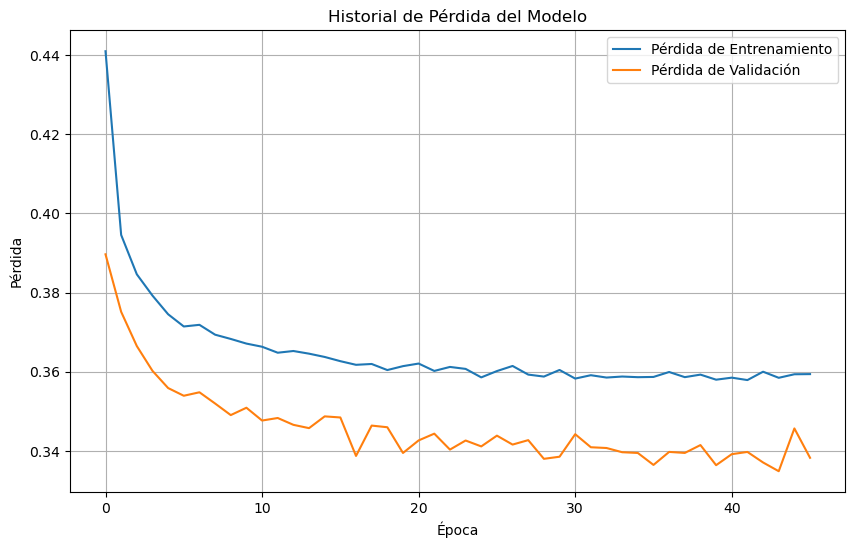

In [ ]:
from tensorflow.keras.models import Sequential # Import Sequential directly
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout # Import specific layer types
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

y_kfeat = df_data_preprocessed[target_column]
X_kfeat = df_data_preprocessed.drop(columns=target_column)

X_train, X_test, y_train, y_test = train_test_split(X_kfeat, y_kfeat, test_size=0.2, random_state=42)

def simple_neural_network(shape):
    # Creamos el modelo
    model = Sequential()
    model.add(Dense(32, input_shape=(shape,), activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    # Compilamos el modelo
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


def train_simple_nn(model, X_train, y_train):

    early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True) # el mode a max es para buscar siempre la máxima accuracy
    history = model.fit(X_train, y_train, callbacks=[early_stopping], epochs=200, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)

    return model, history


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Obtener el número de características de entrada
input_dim = X_train_scaled.shape[1]
print(f"Número de características de entrada (input_dim): {input_dim}")

print("\nCreando el modelo de red neuronal simple...")
# Crear una instancia del modelo
simple_nn_model = simple_neural_network(shape=input_dim)
simple_nn_model.summary() # Muestra un resumen de la arquitectura del modelo

print("\nEntrenando el modelo de red neuronal simple...")
# Entrenar el modelo
trained_model, training_history = train_simple_nn(simple_nn_model, X_train_scaled, y_train)

print("\nEvaluando el modelo en el conjunto de prueba...")
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = trained_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.4f}")


plt.figure(figsize=(10, 6))
plt.plot(training_history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(training_history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Historial de Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(training_history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(training_history.history['val_loss'], label='Pérdida de Validación')
plt.title('Historial de Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

## Pruebas con Random Search

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier # Importar KerasClassifier
import matplotlib.pyplot as plt
import os
from sklearn.datasets import make_classification # Para datos de ejemplo si ejecutas el script completo


y_kfeat = df_data_preprocessed[target_column]
X_kfeat = df_data_preprocessed.drop(columns=target_column)

X_train, X_test, y_train, y_test = train_test_split(X_kfeat, y_kfeat, test_size=0.2, random_state=42)

def simple_neural_network(shape, dense_units_layer1=32, dropout_rate_layer1=0.3, dense_units_layer2=32, dropout_rate_layer2=0.3, learning_rate=0.001, l2_reg=0.0001):

    model = Sequential()
    model.add(Dense(dense_units_layer1, input_shape=(shape,), activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate_layer1))
    model.add(Dense(dense_units_layer2, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate_layer2))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


def train_simple_nn(model, X_train, y_train):
    early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, callbacks=[early_stopping], epochs=200, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)
    return model, history

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

input_dim = X_train_scaled.shape[1]
print(f"Número de características de entrada (input_dim): {input_dim}")

print("\nCreando el modelo de red neuronal simple (con argumentos por defecto)...")
simple_nn_model = simple_neural_network(shape=input_dim)
simple_nn_model.summary()

print("\nEntrenando el modelo de red neuronal simple (con argumentos por defecto)...")
trained_model, training_history = train_simple_nn(simple_nn_model, X_train_scaled, y_train)

print("\nEvaluando el modelo en el conjunto de prueba (con argumentos por defecto)...")
loss, accuracy = trained_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Precisión del modelo en el conjunto de prueba (por defecto): {accuracy:.4f}")

def training_accuracy(history, name_model, output_dir="results/plots"):
    filename= f"training_acc_{name_model}.png"
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Precisión durante el entrenamiento")
    ax.plot(history['accuracy'], label='Precisión de Entrenamiento')
    ax.plot(history['val_accuracy'], label='Precisión de Validación')
    ax.set_xlabel('Época')
    ax.set_ylabel('Precisión')
    ax.legend()
    ax.grid(True)

    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)
    print(f"Curva de precisión del entrenamiento guardada en: {filepath}")

def training_loss(history, name_model, output_dir="results/plots"):
    filename= f"training_loss_{name_model}.png"
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Pérdida durante el entrenamiento")
    ax.plot(history['loss'], label='Pérdida de Entrenamiento')
    ax.plot(history['val_loss'], label='Pérdida de Validación')
    ax.set_xlabel('Época')
    ax.set_ylabel('Pérdida')
    ax.legend()
    ax.grid(True)

    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)
    print(f"Curva de pérdida del entrenamiento guardada en: {filepath}")

def random_search_simple_nn_tuning(X_train_scaled, y_train):


    keras_model = KerasClassifier(
        model=simple_neural_network,
        model__shape=X_train_scaled.shape[1],
        batch_size=32,
        epochs=100,
        verbose=0,

    )

    param_distributions = {
        'model__dense_units_layer1': [32, 64, 128],
        'model__dropout_rate_layer1': [0.2, 0.3, 0.4],
        'model__dense_units_layer2': [32, 64, 128],
        'model__dropout_rate_layer2': [0.2, 0.3, 0.4],
        'model__learning_rate': [0.01, 0.001, 0.0005, 0.0001],
        'model__l2_reg': [0.001, 0.0001, 0.00001],
        'batch_size': [16, 32, 64],
        'epochs': [50, 100, 150, 200]
    }

    random_search = RandomizedSearchCV(
        estimator=keras_model,
        param_distributions=param_distributions,
        n_iter=20,
        cv=3, # 3-fold cross-validation
        scoring='accuracy'
        random_state=42, # Para reproducibilidad
        n_jobs=-1,
        verbose=2,
        error_score='raise'
    )

    print("\nIniciando RandomizedSearchCV para la red neuronal simple...")
    random_search.fit(X_train_scaled, y_train,
                      callbacks=[EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True, verbose=0)],
                      validation_split=0.2
                     )

    best_params = random_search.best_params_
    best_estimator_wrapped = random_search.best_estimator_

    print(f"\nMejores parámetros encontrados: {best_params}")
    print(f"Mejor precisión de validación (CV): {random_search.best_score_:.4f}")


    print("\nEntrenando el modelo FINAL con los mejores parámetros encontrados...")

    model_params_for_final = {k.replace('model__', ''): v for k, v in best_params.items() if k.startswith('model__')}
    model_params_for_final['shape'] = X_train_scaled.shape[1]

    # Creamos la instancia del modelo Keras final con los mejores parámetros
    best_model_keras = simple_neural_network(**model_params_for_final)

    # Configuramos el optimizador y compilamos el modelo final
    final_optimizer = Adam(learning_rate=best_params['model__learning_rate'])
    best_model_keras.compile(optimizer=final_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Configuramos el EarlyStopping para el entrenamiento final
    final_early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=25, restore_best_weights=True, verbose=1) # Un poco más de paciencia para el entrenamiento final

    # Entrenamos el modelo final con los mejores parámetros
    final_training_history = best_model_keras.fit(
        X_train_scaled, y_train,
        epochs=best_params['epochs'] * 2, # Darle suficientes épocas, EarlyStopping lo parará
        batch_size=best_params['batch_size'],
        validation_split=0.2, # Usamos validation_split para EarlyStopping
        callbacks=[final_early_stopping],
        shuffle=True,
        verbose=1
    )

    return best_model_keras, best_params, random_search, final_training_history




print("\n--- Ejecutando RandomizedSearchCV para encontrar los mejores parámetros ---")
best_model_found, best_hyperparameters, search_results_obj, final_hist = \
random_search_simple_nn_tuning(X_train_scaled, y_train)

print("\n--- Evaluación del modelo con los mejores parámetros ---")
loss_best, accuracy_best = best_model_found.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Precisión final del modelo con los mejores parámetros en el conjunto de prueba: {accuracy_best:.4f}")

training_accuracy(final_hist.history, "simple_nn_best_tuned_model")
training_loss(final_hist.history, "simple_nn_best_tuned_model")

Número de características de entrada (input_dim): 41

Creando el modelo de red neuronal simple (con argumentos por defecto)...


C:\Users\gaizk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo de red neuronal simple (con argumentos por defecto)...
Epoch 1/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7628 - loss: 0.4900 - val_accuracy: 0.8271 - val_loss: 0.3866
Epoch 2/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8175 - loss: 0.3992 - val_accuracy: 0.8247 - val_loss: 0.3767
Epoch 3/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8243 - loss: 0.3838 - val_accuracy: 0.8372 - val_loss: 0.3635
Epoch 4/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8285 - loss: 0.3757 - val_accuracy: 0.8371 - val_loss: 0.3608
Epoch 5/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8294 - loss: 0.3731 - val_accuracy: 0.8398 - val_loss: 0.3571
Epoch 6/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8310 - loss: 0.3713 - val_accuracy: 0.8427 - val_loss: 0.3547
Epoch 7/200
7641/7641 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8304 - loss: 0.3713 - val_accuracy: 0.8398 - val_loss: 0.3530

C:\Users\gaizk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Mejores parámetros encontrados: {'model__learning_rate': 0.0005, 'model__l2_reg': 1e-05, 'model__dropout_rate_layer2': 0.4, 'model__dropout_rate_layer1': 0.2, 'model__dense_units_layer2': 64, 'model__dense_units_layer1': 64, 'epochs': 200, 'batch_size': 32}
Mejor precisión de validación (CV): 0.8662

Entrenando el modelo FINAL con los mejores parámetros encontrados...
Epoch 1/400


C:\Users\gaizk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2388/2388 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7533 - loss: 0.5043 - val_accuracy: 0.8119 - val_loss: 0.3970
Epoch 2/400
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8073 - loss: 0.4057 - val_accuracy: 0.8280 - val_loss: 0.3765
Epoch 3/400
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8189 - loss: 0.3847 - val_accuracy: 0.8323 - val_loss: 0.3608
Epoch 4/400
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8283 - loss: 0.3705 - val_accuracy: 0.8376 - val_loss: 0.3542
Epoch 5/400
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8328 - loss: 0.3593 - val_accuracy: 0.8410 - val_loss: 0.3450
Epoch 6/400
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8344 - loss: 0.3570 - val_accuracy: 0.8419 - val_loss: 0.3417
Epoch 7/400
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8361 - loss: 0.3504 - val_accuracy: 0.8433 - val_loss: 0.3400
Epoch 8/400
2388/2388 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8396 - loss: 0.3457 - val

In [ ]:
y_train.info()

Cargar datos (df_data_preprocessed).

Dividir datos en X_train, X_test, y_train, y_test.

(Aquí aplica el balanceo):

Si usas SMOTE, aplícalo a X_train, y_train para obtener X_train_resampled, y_train_resampled.

Escalar datos: Aplica StandardScaler a X_train_resampled (si usaste SMOTE) o a X_train (si no usaste SMOTE), y luego transforma X_test con el mismo escalador entrenado.

Entrenar el modelo: Usa X_train_resampled_scaled (o X_train_scaled) y y_train_resampled (o y_train). Si usas pesos de clase, pásalos al fit().

Evaluar el modelo: Usa X_test_scaled y y_test. Al evaluar, concéntrate en métricas adecuadas para desbalanceo (Precision, Recall, F1-Score, AUC-ROC), no solo en la precisión global.

In [ ]:
!pip install scikeras

## Aplicación de varios selectores de características y balanceo de clases

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import os
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import mutual_info_classif

y = df_data_preprocessed[target_column]
X = df_data_preprocessed.drop(columns=target_column)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Initial X_train shape: {X_train.shape}")
print(f"Initial X_test shape: {X_test.shape}")
print(f"Initial y_train distribution: {y_train.value_counts()}")

# Feature selection aplicando primero Mutual Info y posteirormente RandomForestClassif


print("\n--- Applying Mutual Information for Feature Selection ---")

mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X_train.columns)
mi_scores_series = mi_scores_series.sort_values(ascending=False)

print("Mutual Information Scores:\n", mi_scores_series.head(10))

num_features_mi = 25
selected_features_mi = mi_scores_series.head(num_features_mi).index.tolist()

X_train_mi_selected = X_train[selected_features_mi]
X_test_mi_selected = X_test[selected_features_mi]
print(f"\nFeatures selected by MI ({len(selected_features_mi)}): {selected_features_mi[:5]}...")
print(f"X_train shape after MI selection: {X_train_mi_selected.shape}")
print(f"X_test shape after MI selection: {X_test_mi_selected.shape}")

print("\n--- Applying Random Forest for Feature Importance ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_mi_selected, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_mi_selected.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("Random Forest Feature Importances:\n", feature_importances.head(10))

num_features_rf = 15
selected_features_rf = feature_importances.head(num_features_rf).index.tolist()

# Aqui nos quedamos ya solo con el conjunto final
X_train_final = X_train_mi_selected[selected_features_rf]
X_test_final = X_test_mi_selected[selected_features_rf]
print(f"\nFinal features selected by RF ({len(selected_features_rf)}): {selected_features_rf}")
print(f"X_train shape after RF selection: {X_train_final.shape}")
print(f"X_test shape after RF selection: {X_test_final.shape}")


# Se aplica balanceo de clases


print("\n--- Applying SMOTE for Class Balancing ---")
print(f"y_train distribution BEFORE SMOTE: {Counter(y_train)}")

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train) # Apply SMOTE to final training data

print(f"y_train distribution AFTER SMOTE: {Counter(y_train_resampled)}")
print(f"X_train shape after SMOTE: {X_train_resampled.shape}")


print("\n--- Applying StandardScaler ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled) # Fit and transform on resampled training data
X_test_scaled = scaler.transform(X_test_final)         # Transform test data using the SAME scaler

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


Initial X_train shape: (95512, 41)
Initial X_test shape: (23878, 41)
Initial y_train distribution: is_canceled
0    60259
1    35253
Name: count, dtype: int64

--- Applying Mutual Information for Feature Selection ---
Mutual Information Scores:
 deposit_type_non_refund        0.130748
lead_time                      0.082924
agent                          0.077940
adr                            0.075900
country                        0.063487
previous_cancellations         0.039508
total_of_special_requests      0.037427
required_car_parking_spaces    0.029805
market_segment_groups          0.023698
distribution_channel_ta/to     0.023273
dtype: float64

Features selected by MI (25): ['deposit_type_non_refund', 'lead_time', 'agent', 'adr', 'country']...
X_train shape after MI selection: (95512, 25)
X_test shape after MI selection: (23878, 25)

--- Applying Random Forest for Feature Importance ---
Random Forest Feature Importances:
 lead_time                    0.180121
country          

ImportError: cannot import name '_safe_tags' from 'sklearn.utils._tags' (/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py)

In [ ]:
def simple_neural_network(shape, dense_units_layer1=32, dropout_rate_layer1=0.2, dense_units_layer2=32, dense_units_layer3=32, dropout_rate_layer2=0.2, dropout_rate_layer3=0.2, learning_rate=0.001, l2_reg=0.0001):
    model = Sequential()
    model.add(Dense(dense_units_layer1, input_shape=(shape,), activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate_layer1))
    model.add(Dense(dense_units_layer2, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate_layer2))
    model.add(Dense(dense_units_layer3, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate_layer3))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_simple_nn(model, X_train, y_train):
    early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, callbacks=[early_stopping], epochs=200, batch_size=10, validation_split=0.2, shuffle=True, verbose=1)
    return model, history

input_dim = X_train_scaled.shape[1]
print(f"Número de características de entrada (input_dim): {input_dim}")
print("\nCreando el modelo de red neuronal simple (con argumentos por defecto)...")
simple_nn_model = simple_neural_network(shape=input_dim)
simple_nn_model.summary()

print("\nEntrenando el modelo de red neuronal simple (con argumentos por defecto)...")
trained_model, training_history = train_simple_nn(simple_nn_model, X_train_scaled, y_train_resampled)

print("\nEvaluando el modelo en el conjunto de prueba (con argumentos por defecto)...")
loss, accuracy = trained_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Precisión del modelo en el conjunto de prueba (por defecto): {accuracy:.4f}")

def training_accuracy(history, name_model, output_dir="results/plots"):
    filename= f"training_acc_{name_model}.png"
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Precisión durante el entrenamiento")
    ax.plot(history['accuracy'], label='Precisión de Entrenamiento')
    ax.plot(history['val_accuracy'], label='Precisión de Validación')
    ax.set_xlabel('Época')
    ax.set_ylabel('Precisión')
    ax.legend()
    ax.grid(True)
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)
    print(f"Curva de precisión del entrenamiento guardada en: {filepath}")

def training_loss(history, name_model, output_dir="results/plots"):
    filename= f"training_loss_{name_model}.png"
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Pérdida durante el entrenamiento")
    ax.plot(history['loss'], label='Pérdida de Entrenamiento')
    ax.plot(history['val_loss'], label='Pérdida de Validación')
    ax.set_xlabel('Época')
    ax.set_ylabel('Pérdida')
    ax.legend()
    ax.grid(True)
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)
    print(f"Curva de pérdida del entrenamiento guardada en: {filepath}")

def random_search_simple_nn_tuning(X_train_scaled, y_train):
    keras_model = KerasClassifier(
        model=simple_neural_network,
        model__shape=X_train_scaled.shape[1],
        batch_size=32,
        epochs=50,
        verbose=0,
    )
    param_distributions = {
        'model__dense_units_layer1': [128, 256],
        'model__dropout_rate_layer1': [0.15, 0.2, 0.25],
        'model__dense_units_layer2': [64, 128],
        'model__dropout_rate_layer2': [0.15, 0.2, 0.25],
        'model__dense_units_layer3': [64, 128],
        'model__dropout_rate_layer3': [0.15, 0.2, 0.25],
        'model__learning_rate': [0.0003, 0.0005, 0.0007],
        'model__l2_reg': [5e-6, 1e-5, 2e-5],
        'batch_size': [32, 64],
        'epochs': [80, 100, 120]
    }
    random_search = RandomizedSearchCV(
        estimator=keras_model,
        param_distributions=param_distributions,
        n_iter=50,
        cv=3,
        scoring='f1_weighted',
        random_state=42,
        n_jobs=-1,
        verbose=2,
        error_score='raise'
    )
    print("\nIniciando RandomizedSearchCV para la red neuronal simple...")
    random_search.fit(X_train_scaled, y_train_resampled,
                      callbacks=[EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True, verbose=0)],
                      validation_split=0.2
                     )
    best_params = random_search.best_params_
    best_estimator_wrapped = random_search.best_estimator_
    print(f"\nMejores parámetros encontrados: {best_params}")
    print(f"Mejor precisión de validación (CV): {random_search.best_score_:.4f}")
    print("\nEntrenando el modelo FINAL con los mejores parámetros encontrados...")
    model_params_for_final = {k.replace('model__', ''): v for k, v in best_params.items() if k.startswith('model__')}
    model_params_for_final['shape'] = X_train_scaled.shape[1]
    best_model_keras = simple_neural_network(**model_params_for_final)
    final_optimizer = Adam(learning_rate=best_params['model__learning_rate'])
    best_model_keras.compile(optimizer=final_optimizer, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    final_early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=25, restore_best_weights=True, verbose=1)
    final_training_history = best_model_keras.fit(
        X_train_scaled, y_train,
        epochs=best_params['epochs'] * 2,
        batch_size=best_params['batch_size'],
        validation_split=0.2,
        callbacks=[final_early_stopping],
        shuffle=True,
        verbose=1
    )
    return best_model_keras, best_params, random_search, final_training_history


print("\n--- Ejecutando RandomizedSearchCV para encontrar los mejores parámetros ---")
best_model_found, best_hyperparameters, search_results_obj, final_hist = random_search_simple_nn_tuning(X_train_scaled, y_train_resampled)
print("\n--- Evaluación del modelo con los mejores parámetros ---")
loss_best, accuracy_best = best_model_found.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Precisión final del modelo con los mejores parámetros en el conjunto de prueba: {accuracy_best:.4f}")
training_accuracy(final_hist.history, "simple_nn_best_tuned_model")
training_loss(final_hist.history, "simple_nn_best_tuned_model")

Número de características de entrada (input_dim): 15

Creando el modelo de red neuronal simple (con argumentos por defecto)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,657 (10.38 KB)

 Trainable params: 2,657 (10.38 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo de red neuronal simple (con argumentos por defecto)...
Epoch 1/200
9575/9575 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.7778 - loss: 0.4623 - val_accuracy: 0.6227 - val_loss: 0.6515
Epoch 2/200
9575/9575 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8185 - loss: 0.3943 - val_accuracy: 0.6821 - val_loss: 0.5744
Epoch 3/200
9575/9575 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8254 - loss: 0.3836 - val_accuracy: 0.6965 - val_loss: 0.5407
Epoch 4/200
9575/9575 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8285 - loss: 0.3761 - val_accuracy: 0.7167 - val_loss: 0.5319
Epoch 5/200
9575/9575 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.8303 - loss: 0.3747 - val_accuracy: 0.7187 - val_loss: 0.5221
Epoch 6/200
9575/9575 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8323 - loss: 0.3700 - val_accuracy: 0.6523 - val_loss: 0.6250
Epoch 7/200
9575/9575 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8337 - loss: 0.3690 - val_accuracy: 0.7150 - val_loss: 0.5216

AttributeError: 'super' object has no attribute '__sklearn_tags__'

## Selección de gridsearch medium article

In [ ]:
# Igual aquellas características a las que le pasamos un dict en lugar de get_dummies o one-hot encoding deberíamos ver la mejor opción

def gridsearch_result(grid_result):
    print("+"*100)
    print("| Best parameter : ",grid_result.best_params_," |")
    print("+"*100)
    print("")
    print("="*50)
    print("TRAIN Scores of each model : ")
    mean_train_score_lr = grid_result.cv_results_['mean_train_score']
    print(mean_train_score_lr)
    print("TEST Scores of each model : ")
    mean_test_score_lr = grid_result.cv_results_['mean_test_score']
    print(mean_test_score_lr)
# plot train v/s test score
    plt.plot(mean_train_score_lr, label='train recall')
    plt.plot(mean_test_score_lr, label='test recall')
    plt.title('TRAIN v/s TEST recall score')
    plt.legend()
    plt.show()

In [ ]:
# funcion que ayuda a determinar que características son las mas relevantes en el modelo con los  ejores parámetros

def feature_importance_lr(best_lr_model, tfidf):
    # get importance
    importance = best_lr_model.coef_[0]
    # get feature names using
    features = tfidf.get_feature_names()

    feature_importance_lr = dict(zip(list(importance),list(features)))

    feature_importance_top = sorted(feature_importance_lr.items(),reverse=True)[:30]
    feature_importance_bottom = sorted(feature_importance_lr.items(),reverse=True)[-30:]

    print("Features which are contributing a lot to classify the story as comment")
    for k in feature_importance_top:
        print(k)
    print("="*50)
    print("Features which are against to classify the story as 'comment'.")
    for k in feature_importance_bottom[::-1]:
        print(k) # just reversed

In [ ]:
# Hyper parameter tuning

from sklearn.linear_model import LogisticRegression
# I will use solver='saga', because It supports all the regularization
# Reularization terms in Logistic regression are
# 1. solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
# 2. penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
# 3. C in [100, 10, 1.0, 0.1, 0.01]
# HYPER-PARAMETERS
solvers = ['saga'] # I will just use saga, because it supports all the penalties
penalty = ['l2','l1'] # elasticnet = l1+l2
c_values = [10, 1.0, 0.1]
c_weights = [None, 'balanced'] # balanced is used in place of Upsampling of data.
# Creating dictionary of hyper-parameters
grid = dict(
    solver=solvers,
    penalty=penalty,
    C=c_values,
    class_weight=c_weights
)
# Creating instance of RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# Creating instance of Logistic Regression
lr_model = LogisticRegression()
# Creating instance of GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, # model to be tuned
                           param_grid=grid, # tuning parameters
                           n_jobs=-1, # Use all cores of CPU
                           cv=cv,  # cross-validation information
                           scoring='recall', # metrics to assess and get the best model
                           error_score=0
                          )
# making return_train_score true to get training score also in GridSearchCV
# to judge model overiftting
grid_search.return_train_score = True
# fitting the grid_search model and saving the result in the variable
grid_result = grid_search.fit(tfidf_train, train_label)

In [ ]:
# Esta función me parece curiosa, podemos emplearla para realizar predicciones de una determinada entrada

def comment_prediction(model, query):
    """
    This method predicts the whether given query is of Commenting query or not.
    """
    query = pd.Series(query).apply(preprocess)
    tfidf = pickle.load(open(os.path.join(save_model_path,'tfidf.pkl'),'rb'))
    query = tfidf.transform(query)
    q_pred = model.predict_proba(query)[0][1]
    if q_pred <= 0.5:
        print("Non commenting : {}".format(q_pred))
        return q_pred
    else:
        print("Commenting : {}".format(q_pred))
        return q_pred

In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split, ParameterSampler, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

y = df_data_preprocessed[target_column]
X = df_data_preprocessed.drop(columns=target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Initial X_train shape: {X_train.shape}")
print(f"Initial X_test shape: {X_test.shape}")
print(f"Initial y_train distribution: {y_train.value_counts()}")

class FeatureSelectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_features_mi=25, num_features_rf=15, random_state=42):
        self.num_features_mi = num_features_mi
        self.num_features_rf = num_features_rf
        self.random_state = random_state
        self.selected_features_ = None
        self.input_features_names_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.input_features_names_ = X.columns.tolist()
        else:
            self.input_features_names_ = [f'feature_{i}' for i in range(X.shape[1])]
            X = pd.DataFrame(X, columns=self.input_features_names_)

        mi_scores = mutual_info_classif(X, y, random_state=self.random_state)
        mi_scores_series = pd.Series(mi_scores, index=X.columns)
        mi_scores_series = mi_scores_series.sort_values(ascending=False)
        selected_features_mi = mi_scores_series.head(self.num_features_mi).index.tolist()

        X_mi_selected = X[selected_features_mi]

        rf_model = RandomForestClassifier(n_estimators=100, random_state=self.random_state, n_jobs=-1)
        rf_model.fit(X_mi_selected, y)

        feature_importances = pd.Series(rf_model.feature_importances_, index=X_mi_selected.columns)
        feature_importances = feature_importances.sort_values(ascending=False)
        self.selected_features_ = feature_importances.head(self.num_features_rf).index.tolist()

        return self

    def transform(self, X):
        if self.selected_features_ is None:
            raise RuntimeError("FeatureSelectorTransformer has not been fitted yet.")

        if not isinstance(X, pd.DataFrame):
            if not hasattr(self, 'input_features_names_') or len(self.input_features_names_) != X.shape[1]:
                raise ValueError("X must be a pandas DataFrame or have consistent shape with fit input for FeatureSelectorTransformer.")
            X_df = pd.DataFrame(X, columns=self.input_features_names_)
        else:
            X_df = X

        transformed_X = X_df[self.selected_features_]
        return transformed_X.values

def simple_neural_network(input_dim, dense_units_layer1=32, dropout_rate_layer1=0.2,
                          dense_units_layer2=32, dense_units_layer3=32, dropout_rate_layer2=0.2, dropout_rate_layer3=0.2,
                          learning_rate=0.001, l2_reg=0.0001):
    model = Sequential()
    model.add(Dense(dense_units_layer1, input_shape=(input_dim,), activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate_layer1))
    model.add(Dense(dense_units_layer2, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate_layer2))
    model.add(Dense(dense_units_layer3, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate_layer3))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])
    return model

def training_accuracy(history, name_model, output_dir="results/plots"):
    filename = f"training_acc_{name_model}.png"
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Precisión durante el entrenamiento")
    ax.plot(history['accuracy'], label='Precisión de Entrenamiento')
    ax.plot(history['val_accuracy'], label='Precisión de Validación')
    ax.set_xlabel('Época')
    ax.set_ylabel('Precisión')
    ax.legend()
    ax.grid(True)
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)
    print(f"Curva de precisión del entrenamiento guardada en: {filepath}")

def training_loss(history, name_model, output_dir="results/plots"):
    filename = f"training_loss_{name_model}.png"
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Pérdida durante el entrenamiento")
    ax.plot(history['loss'], label='Pérdida de Entrenamiento')
    ax.plot(history['val_loss'], label='Pérdida de Validación')
    ax.set_xlabel('Época')
    ax.set_ylabel('Pérdida')
    ax.legend()
    ax.grid(True)
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)
    fig.savefig(filepath)
    plt.close(fig)
    print(f"Curva de pérdida del entrenamiento guardada en: {filepath}")

def manual_pipeline_tuning(X_train, y_train, X_test, y_test, n_iter=10):
    param_distributions_feature_selector = {
        'num_features_mi': [20, 25, 30],
        'num_features_rf': [10, 15, 20]
    }

    param_distributions_nn = {
        'dense_units_layer1': [128, 256],
        'dropout_rate_layer1': [0.15, 0.2, 0.25],
        'dense_units_layer2': [64, 128],
        'dropout_rate_layer2': [0.15, 0.2, 0.25],
        'dense_units_layer3': [64, 128],
        'dropout_rate_layer3': [0.15, 0.2, 0.25],
        'learning_rate': [0.0003, 0.0005, 0.0007],
        'l2_reg': [5e-6, 1e-5, 2e-5],
        'batch_size': [32, 64],
        'epochs': [80, 100, 120],
        'class_weight': [None, 'balanced']
    }

    feature_selector_param_sampler = ParameterSampler(
        param_distributions_feature_selector, n_iter=n_iter, random_state=42
    )

    all_results = []
    best_f1_score = -np.inf
    best_overall_pipeline = None
    best_overall_params = None
    best_overall_history = None

    scaler = StandardScaler()

    for fs_idx, fs_params in enumerate(feature_selector_param_sampler):
        print(f"\n--- Probando combinación de Feature Selector ({fs_idx+1}/{n_iter}): {fs_params} ---")

        current_fs_pipeline = Pipeline([
            ('feature_selector', FeatureSelectorTransformer(**fs_params)),
            ('scaler', StandardScaler())
        ])

        X_train_transformed = current_fs_pipeline.fit_transform(X_train, y_train)
        current_input_dim = X_train_transformed.shape[1]
        print(f"Input dimension for NN after feature selection: {current_input_dim}")

        nn_param_sampler = ParameterSampler(
            param_distributions_nn, n_iter=1, random_state=fs_idx + 100
        )

        for nn_idx, nn_params in enumerate(nn_param_sampler):
            print(f"--- Probando combinación de NN ({nn_idx+1}/1): {nn_params} ---")

            keras_class_weight = None
            if nn_params['class_weight'] == 'balanced':
                class_counts = Counter(y_train)
                total_samples = sum(class_counts.values())
                keras_class_weight = {cls: total_samples / (2 * count) for cls, count in class_counts.items()}
                print(f"Calculated class weights: {keras_class_weight}")
            else:
                keras_class_weight = None

            nn_fit_params = {k: v for k, v in nn_params.items() if k not in ['batch_size', 'epochs', 'class_weight']}
            batch_size = nn_params['batch_size']
            epochs = nn_params['epochs']

            K.clear_session()
            model = simple_neural_network(
                input_dim=current_input_dim,
                **nn_fit_params
            )

            early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True, verbose=0)

            history = model.fit(
                X_train_transformed, y_train,
                validation_split=0.2,
                epochs=epochs,
                batch_size=batch_size,
                class_weight=keras_class_weight,
                callbacks=[early_stopping],
                verbose=0
            )

            X_test_transformed = current_fs_pipeline.transform(X_test)
            y_pred_proba = model.predict(X_test_transformed, verbose=0)
            y_pred = (y_pred_proba > 0.5).astype(int)

            f1 = f1_score(y_test, y_pred, average='weighted')
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            auc = roc_auc_score(y_test, y_pred_proba)

            print(f"  F1-weighted on X_test: {f1:.4f}")

            all_results.append({
                'fs_params': fs_params,
                'nn_params': nn_params,
                'input_dim': current_input_dim,
                'f1_score_test': f1,
                'accuracy_test': accuracy,
                'precision_test': precision,
                'recall_test': recall,
                'auc_test': auc,
                'keras_history': history.history
            })

            if f1 > best_f1_score:
                best_f1_score = f1
                best_overall_pipeline = current_fs_pipeline
                best_overall_nn_model = model
                best_overall_params = {'fs': fs_params, 'nn': nn_params}
                best_overall_history = history.history

    print("\n--- Tuning manual completado ---")
    print(f"Mejor F1-weighted encontrado: {best_f1_score:.4f}")
    print(f"Mejores parámetros generales: {best_overall_params}")

    if best_overall_pipeline and best_overall_nn_model:
        print("\n--- Re-evaluando el mejor modelo encontrado en X_test ---")
        X_test_final_transformed = best_overall_pipeline.transform(X_test)
        y_pred_proba_final = best_overall_nn_model.predict(X_test_final_transformed, verbose=0)
        y_pred_final = (y_pred_proba_final > 0.5).astype(int)

        loss_final, accuracy_final, precision_final, recall_final, auc_final = \
            best_overall_nn_model.evaluate(X_test_final_transformed, y_test, verbose=0)

        print(f"Precisión final del pipeline en el conjunto de prueba: {accuracy_final:.4f}")
        print(f"Pérdida final del pipeline en el conjunto de prueba: {loss_final:.4f}")
        print(f"Precisión (P) final del pipeline en el conjunto de prueba: {precision_final:.4f}")
        print(f"Recall (R) final del pipeline en el conjunto de prueba: {recall_final:.4f}")
        print(f"AUC final del pipeline en el conjunto de prueba: {auc_final:.4f}")
        print(f"F1-weighted final: {f1_score(y_test, y_pred_final, average='weighted'):.4f}")

    return best_overall_pipeline, best_overall_nn_model, best_overall_params, best_overall_history, all_results


print("\n--- Ejecutando tuning de pipeline personalizado (sin scikeras) ---")
best_fs_pipeline, best_nn_model, best_params_found, final_hist, all_tuning_results = \
manual_pipeline_tuning(X_train, y_train, X_test, y_test, n_iter=5)

if final_hist:
    training_accuracy(final_hist, "best_manual_pipeline_nn_model")
    training_loss(final_hist, "best_manual_pipeline_nn_model")

Initial X_train shape: (95512, 41)
Initial X_test shape: (23878, 41)
Initial y_train distribution: is_canceled
0    60133
1    35379
Name: count, dtype: int64

--- Ejecutando tuning de pipeline personalizado (sin scikeras) ---

--- Probando combinación de Feature Selector (1/5): {'num_features_rf': 15, 'num_features_mi': 30} ---
Input dimension for NN after feature selection: 15
--- Probando combinación de NN (1/1): {'learning_rate': 0.0003, 'l2_reg': 2e-05, 'epochs': 120, 'dropout_rate_layer3': 0.2, 'dropout_rate_layer2': 0.15, 'dropout_rate_layer1': 0.25, 'dense_units_layer3': 128, 'dense_units_layer2': 128, 'dense_units_layer1': 256, 'class_weight': None, 'batch_size': 32} ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  F1-weighted on X_test: 0.8463

--- Probando combinación de Feature Selector (2/5): {'num_features_rf': 15, 'num_features_mi': 20} ---
Input dimension for NN after feature selection: 15
--- Probando combinación de NN (1/1): {'learning_rate': 0.0007, 'l2_reg': 5e-06, 'epochs': 80, 'dropout_rate_layer3': 0.2, 'dropout_rate_layer2': 0.15, 'dropout_rate_layer1': 0.15, 'dense_units_layer3': 64, 'dense_units_layer2': 128, 'dense_units_layer1': 128, 'class_weight': None, 'batch_size': 64} ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  F1-weighted on X_test: 0.8527

--- Probando combinación de Feature Selector (3/5): {'num_features_rf': 20, 'num_features_mi': 25} ---
Input dimension for NN after feature selection: 20
--- Probando combinación de NN (1/1): {'learning_rate': 0.0007, 'l2_reg': 5e-06, 'epochs': 120, 'dropout_rate_layer3': 0.2, 'dropout_rate_layer2': 0.15, 'dropout_rate_layer1': 0.2, 'dense_units_layer3': 64, 'dense_units_layer2': 128, 'dense_units_layer1': 256, 'class_weight': 'balanced', 'batch_size': 32} ---
Calculated class weights: {0: 0.7941729167013121, 1: 1.3498403007433788}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  F1-weighted on X_test: 0.8577

--- Probando combinación de Feature Selector (4/5): {'num_features_rf': 10, 'num_features_mi': 20} ---
Input dimension for NN after feature selection: 10
--- Probando combinación de NN (1/1): {'learning_rate': 0.0005, 'l2_reg': 1e-05, 'epochs': 80, 'dropout_rate_layer3': 0.15, 'dropout_rate_layer2': 0.25, 'dropout_rate_layer1': 0.2, 'dense_units_layer3': 64, 'dense_units_layer2': 128, 'dense_units_layer1': 256, 'class_weight': 'balanced', 'batch_size': 64} ---
Calculated class weights: {0: 0.7941729167013121, 1: 1.3498403007433788}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  F1-weighted on X_test: 0.8384

--- Probando combinación de Feature Selector (5/5): {'num_features_rf': 20, 'num_features_mi': 30} ---
Input dimension for NN after feature selection: 20
--- Probando combinación de NN (1/1): {'learning_rate': 0.0007, 'l2_reg': 2e-05, 'epochs': 120, 'dropout_rate_layer3': 0.25, 'dropout_rate_layer2': 0.25, 'dropout_rate_layer1': 0.15, 'dense_units_layer3': 128, 'dense_units_layer2': 128, 'dense_units_layer1': 128, 'class_weight': 'balanced', 'batch_size': 32} ---
Calculated class weights: {0: 0.7941729167013121, 1: 1.3498403007433788}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  F1-weighted on X_test: 0.8588

--- Tuning manual completado ---
Mejor F1-weighted encontrado: 0.8588
Mejores parámetros generales: {'fs': {'num_features_rf': 20, 'num_features_mi': 30}, 'nn': {'learning_rate': 0.0007, 'l2_reg': 2e-05, 'epochs': 120, 'dropout_rate_layer3': 0.25, 'dropout_rate_layer2': 0.25, 'dropout_rate_layer1': 0.15, 'dense_units_layer3': 128, 'dense_units_layer2': 128, 'dense_units_layer1': 128, 'class_weight': 'balanced', 'batch_size': 32}}

--- Re-evaluando el mejor modelo encontrado en X_test ---
Precisión final del pipeline en el conjunto de prueba: 0.8579
Pérdida final del pipeline en el conjunto de prueba: 0.3184
Precisión (P) final del pipeline en el conjunto de prueba: 0.7899
Recall (R) final del pipeline en el conjunto de prueba: 0.8399
AUC final del pipeline en el conjunto de prueba: 0.9390
F1-weighted final: 0.8588
Curva de precisión del entrenamiento guardada en: results/plots/training_acc_best_manual_pipeline_nn_model.png
Curva de pérdida del entrenami

## Pruebas con HyperOpt

In [ ]:
!pip install hyperopt

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight

y = df_data_preprocessed[target_column]
X = df_data_preprocessed.drop(columns=target_column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Initial X_train shape: {X_train.shape}")
print(f"Initial X_test shape: {X_test.shape}")
print(f"Initial y_train distribution: {y_train.value_counts()}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_hp, X_val_hp, y_train_hp, y_val_hp = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42, stratify=y_train
)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))


def create_nn_model(input_dim, num_hidden_layers, units, learning_rate, dropout_rate):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))

    for i in range(num_hidden_layers):
        model.add(layers.Dense(units, activation='relu'))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


def objective(params):
    tf.keras.backend.clear_session()

    input_dim = X_train_hp.shape[1]
    model = create_nn_model(
        input_dim=input_dim,
        num_hidden_layers=int(params['num_hidden_layers']),
        units=int(params['units']),
        learning_rate=params['learning_rate'],
        dropout_rate=params['dropout_rate']
    )

    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    history = model.fit(
        X_train_hp, y_train_hp,
        epochs=params['epochs'],
        batch_size=int(params['batch_size']),
        verbose=0,
        validation_data=(X_val_hp, y_val_hp),
        callbacks=[early_stopping, reduce_lr],
        class_weight=class_weights_dict
    )

    val_accuracy = history.history['val_accuracy'][-1]
    loss = history.history['val_loss'][-1]

    return {
        'loss': -val_accuracy,
        'status': STATUS_OK,
        'val_accuracy': val_accuracy
    }

space = {
    'num_hidden_layers': hp.choice('num_hidden_layers', [1, 2, 3]),
    'units': hp.choice('units', [128, 256, 512]),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.0001), np.log(0.01)),
    'dropout_rate': hp.uniform('dropout_rate', 0.0, 0.5),
    'batch_size': hp.choice('batch_size', [64, 128, 256]),
    'epochs': hp.choice('epochs', [50, 100])
}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

print("\n--- Resultados de Hyperopt ---")
print("Mejores Hiperparámetros encontrados (índices): ", best)

Initial X_train shape: (95512, 41)
Initial X_test shape: (23878, 41)
Initial y_train distribution: is_canceled
0    60133
1    35379
Name: count, dtype: int64
100%|██████████| 100/100 [3:53:48<00:00, 140.28s/trial, best loss: -0.8744176030158997]

--- Resultados de Hyperopt ---
Mejores Hiperparámetros encontrados (índices):  {'batch_size': np.int64(1), 'dropout_rate': np.float64(0.22750124703075916), 'epochs': np.int64(0), 'learning_rate': np.float64(0.005179732331111414), 'num_hidden_layers': np.int64(1), 'units': np.int64(1)}


In [ ]:
best_params_hyperopt = {
    'num_hidden_layers': [1, 2, 3][best['num_hidden_layers']],
    'units': [128, 256, 512][best['units']],
    'learning_rate': best['learning_rate'],
    'dropout_rate': best['dropout_rate'],
    'batch_size': [64, 128, 256][best['batch_size']],
    'epochs': [50, 100][best['epochs']]
}

print("Mejores Hiperparámetros (valores): ", best_params_hyperopt)

print("\n--- Entrenando el modelo final con los mejores hiperparámetros ---")
final_model = create_nn_model(
    input_dim=X_train_scaled.shape[1],
    num_hidden_layers=best_params_hyperopt['num_hidden_layers'],
    units=best_params_hyperopt['units'],
    learning_rate=best_params_hyperopt['learning_rate'],
    dropout_rate=best_params_hyperopt['dropout_rate']
    # class_weight=class_weights_dict
)

final_model.fit(
    X_train_scaled, y_train,
    epochs=best_params_hyperopt['epochs'],
    batch_size=best_params_hyperopt['batch_size'],
    verbose=1, # Mostrar progreso para el entrenamiento final
    class_weight=class_weights_dict
)

# Evaluar el modelo final en el conjunto de prueba
loss, accuracy = final_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Accuracy final del modelo en el conjunto de prueba: {accuracy:.4f}")

Mejores Hiperparámetros (valores):  {'num_hidden_layers': 2, 'units': 256, 'learning_rate': np.float64(0.005179732331111414), 'dropout_rate': np.float64(0.22750124703075916), 'batch_size': 128, 'epochs': 50}

--- Entrenando el modelo final con los mejores hiperparámetros ---
Epoch 1/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7892 - loss: 0.4369
Epoch 2/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8263 - loss: 0.3741
Epoch 3/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8340 - loss: 0.3606
Epoch 4/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8380 - loss: 0.3499
Epoch 5/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8406 - loss: 0.3472
Epoch 6/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8404 - loss: 0.3415
Epoch 7/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8428 - loss: 0.3416
Epoch 8/50
747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8450 - loss: 0.3368
Epoch 9/50
747/747 ━━━━━━━━━━━━━━━━━

In [ ]:
import os

model_save_path = 'modelo_cancelaciones.keras'

print(f"\n--- Guardando el modelo en: {model_save_path} ---")
final_model.save(model_save_path)
print("Modelo guardado exitosamente.")


--- Guardando el modelo en: modelo_cancelaciones.keras ---
Modelo guardado exitosamente.


In [ ]:
print("Mejores Hiperparámetros (valores): ", best_params_hyperopt)

Mejores Hiperparámetros (valores):  {'num_hidden_layers': 2, 'units': 256, 'learning_rate': np.float64(0.005179732331111414), 'dropout_rate': np.float64(0.22750124703075916), 'batch_size': 128, 'epochs': 50}


In [ ]:
# --- Funciones para mostrar métricas de clasificación ---
def evaluate_classification_metrics(model, X_test, y_test, threshold=0.5):
    """
    Evalúa y muestra métricas de clasificación para un modelo Keras.

    Args:
        model (keras.Model): El modelo Keras entrenado.
        X_test (np.array): Características del conjunto de prueba.
        y_test (np.array): Etiquetas verdaderas del conjunto de prueba.
        threshold (float): Umbral para convertir probabilidades en predicciones binarias.
    """
    print("\n--- Evaluación de Métricas de Clasificación en el Conjunto de Prueba ---")

    # Obtener predicciones de probabilidad
    y_pred_probs = model.predict(X_test, verbose=0)

    # Convertir probabilidades a predicciones binarias
    y_pred_binary = (y_pred_probs > threshold).astype(int)

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred_binary)
    print("\nMatriz de Confusión:")
    print(cm)
    print(f"  True Negatives (TN): {cm[0, 0]}")
    print(f"  False Positives (FP): {cm[0, 1]}")
    print(f"  False Negatives (FN): {cm[1, 0]}")
    print(f"  True Positives (TP): {cm[1, 1]}")

    # Reporte de Clasificación (incluye precisión, recall, f1-score)
    print("\nReporte de Clasificación:")
    print(classification_report(y_test, y_pred_binary))

    # Métricas individuales (para referencia explícita)
    print(f"Accuracy: {accuracy_score(y_test, y_pred_binary):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_binary):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_binary):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred_binary):.4f}")

# --- Llamar a la función de evaluación después de entrenar el modelo final ---
evaluate_classification_metrics(final_model, X_test_scaled, y_test)



--- Evaluación de Métricas de Clasificación en el Conjunto de Prueba ---

Matriz de Confusión:
[[13972  1061]
 [ 1947  6898]]
  True Negatives (TN): 13972
  False Positives (FP): 1061
  False Negatives (FN): 1947
  True Positives (TP): 6898

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     15033
           1       0.87      0.78      0.82      8845

    accuracy                           0.87     23878
   macro avg       0.87      0.85      0.86     23878
weighted avg       0.87      0.87      0.87     23878

Accuracy: 0.8740
Precision: 0.8667
Recall: 0.7799
F1-Score: 0.8210
